In [1]:
import cv2 as cv #to get the hand-written digits images as inputs
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf #produce nural network
import pandas as pd

In [2]:
mnist= tf.keras.datasets.mnist #to get the data of digits
(x_train,y_train),(x_test,y_test)=mnist.load_data() #to load and split data into training and validation data


In [3]:
#to normalize data into zeros and ones so that the computer can understand it
x_train = tf.keras.utils.normalize(x_train,axis=1) 
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [4]:
#Build the moddel

model = tf.keras.models.Sequential() #Basic nural network

model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #Add flat layer and spicify the input shapt to be 28*28 px
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu)) #Add Dense layer with relu activation fn.
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu)) #Add another Dense layer with relu activation fn.
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)) #Add another Dense layer with softmax activation fn.

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
model.fit(x_train,y_train,epochs=3)
loss,accuracy = model.evaluate(x_test,y_test)
print(accuracy)
print(loss)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2648 - accuracy: 0.9219
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1076 - accuracy: 0.9667
Epoch 3/3
313/313 [==============================] - 0s 889us/step - loss: 0.0929 - accuracy: 0.9706
0.9706000089645386
0.092897430062294


In [6]:
model.save('digits.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: digits.model\assets


The result is propably: 3


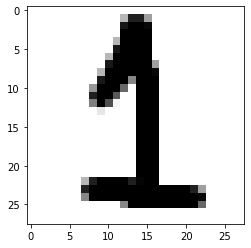

The result is propably: 2


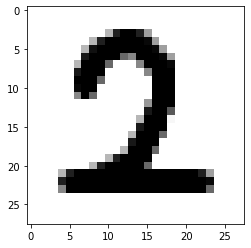

The result is propably: 3


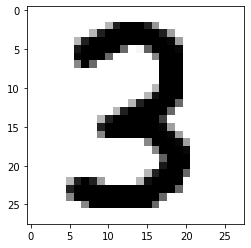

The result is propably: 3


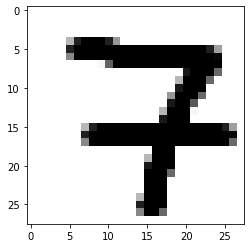

The result is propably: 8


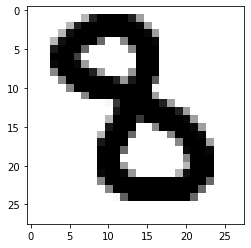

In [7]:
for x in range(20,25):
    img = cv.imread(f'{x}.png')[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f'The result is propably: {np.argmax(prediction)}')
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()

In [8]:
prediction = model.predict(img)
print(np.argmax(prediction))

8
